# Άσκηση 1, Κβάντιση

Θεωρήστε την έγχρωμη εικόνα ‘flowers.jpg’.

**Ζητούμενα:**

Α. Υλοποιήστε έναν κβαντιστή χρωμάτων στον χώρο RGB που να στηρίζεται στην χρήση
του αλγορίθμου ομαδοποίησης ‘K-means’.

Β. Υπολογίστε και τυπώστε την κβαντισμένη εκδοχή της αρχικής εικόνας που να περιέχει 5, 20, 200 και 1000 επίπεδα κβάντισης (χρώματα).

Γ. Υπολογίστε το μέσο τετραγωνικό σφάλμα κβάντισης σε κάθε περίπτωση και σχολιάστε τα αποτελέσματα.


In [5]:
%pip install matplotlib numpy scikit-image scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


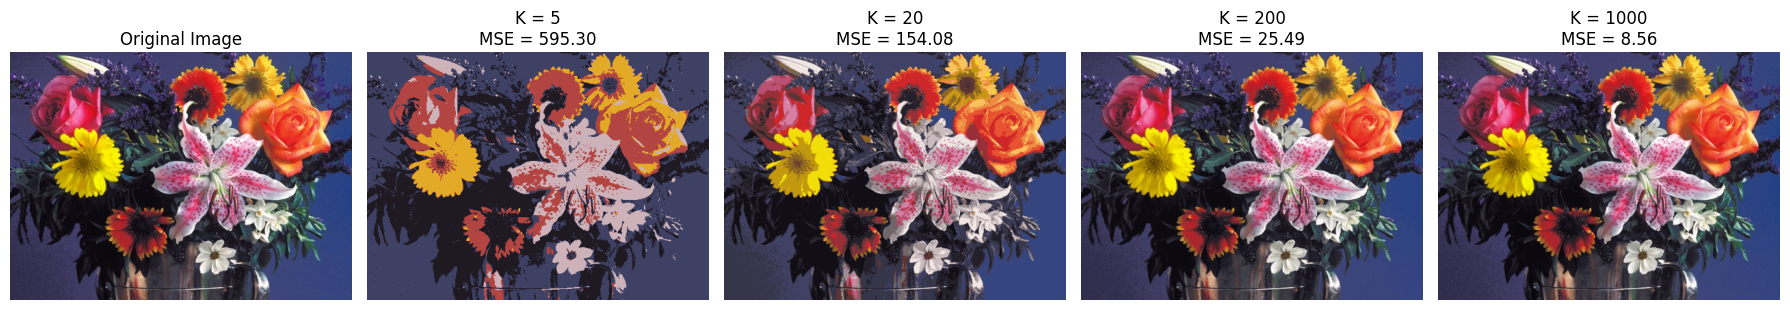

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

# Φόρτωση της εικόνας
image_flowers = ski.io.imread("https://github.com/KaratziasK/Digital-Image-Processing/blob/main/project-1/instructions/images-project-1/flowers.jpg?raw=true")

# Μετατροπή της εικόνας σε 2D πίνακα
image_reshaped = image_flowers.reshape((-1, 3))

K_values = [5, 20, 200, 1000]

fig, axs = plt.subplots(1, 5, figsize=(18, 5))

# Πρώτη εικόνα: original
axs[0].imshow(image_flowers)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Υπόλοιπες: κβαντισμένες εικόνες
for i, K in enumerate(K_values):
    kmeans = KMeans(n_clusters=K,).fit(image_reshaped)
    quantized_image = kmeans.cluster_centers_[kmeans.labels_]

    mse = mean_squared_error(image_reshaped, quantized_image)
    quantized_image_reshaped = quantized_image.reshape(image_flowers.shape).astype(np.uint8)

    axs[i + 1].imshow(quantized_image_reshaped)
    axs[i + 1].set_title(f"K = {K}\nMSE = {mse:.2f}")
    axs[i + 1].axis("off")

plt.tight_layout()
plt.show()




---


# Σχολιασμός Αποτελεσμάτων Κβάντισης


* Καθώς ο αριθμός των επιπέδων κβάντισης αυξάνεται, το μέσο τετραγωνικό σφάλμα μειώνεται.

* Με 5 χρώματα, η εικόνα χάνει πολλές λεπτομέρειες και περιοχές με παρόμοια χρώματα συγχωνεύονται. (Μέσο τετραγωνικό σφάλμα ≈ 595.3)

* Με 20 χρώματα, η ποιότητα βελτιώνεται αρκετά. (Μέσο τετραγωνικό σφάλμα ≈ 155.2)

* Με 200 χρώματα, η εικόνα πλησιάζει την αρχική, με μικρή απώλεια πληροφορίας. (Μέσο τετραγωνικό σφάλμα ≈ 25.2)
 
* Με 1000 χρώματα, η διαφορά από την αρχική εικόνα δεν είναι ορατή. (Μέσο τετραγωνικό σφάλμα ≈ 8.5) 


---

